In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/Lettuce'
train_dir = f'{base_dir}/train'
valid_dir = f'{base_dir}/valid'
test_dir = f'{base_dir}/test'


In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt


In [4]:
# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Validation and test data generators
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_test_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 1277 images belonging to 4 classes.
Found 68 images belonging to 4 classes.
Found 68 images belonging to 4 classes.


In [5]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # 4 classes: Healthy, -K, -N, -P


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 421s 9s/step - accuracy: 0.7959 - loss: 2.4432 - val_accuracy: 0.2188 - val_loss: 1.2606
Epoch 2/25
 1/39 ━━━━━━━━━━━━━━━━━━━━ 1:03 2s/step - accuracy: 0.7188 - loss: 0.5144

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7188 - loss: 0.5144 - val_accuracy: 0.0000e+00 - val_loss: 1.4287
Epoch 3/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8364 - loss: 0.3463 - val_accuracy: 0.3750 - val_loss: 1.1652
Epoch 4/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9375 - loss: 0.1987 - val_accuracy: 0.2500 - val_loss: 1.4026
Epoch 5/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.9008 - loss: 0.2690 - val_accuracy: 0.5000 - val_loss: 1.0214
Epoch 6/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9310 - loss: 0.1442 - val_accuracy: 0.5000 - val_loss: 0.8955
Epoch 7/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.9091 - loss: 0.2153 - val_accuracy: 0.4375 - val_loss: 1.0404
Epoch 8/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8438 - loss: 0.4086 - val_accuracy: 0.5000 - val_loss: 0.8227
Epoch 9/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.9036 - loss: 0.2277 - val_accuracy: 0.6094 - val_loss: 0

In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

print(f"Test Accuracy: {test_acc}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.9688 - loss: 0.3123
Test Accuracy: 0.953125


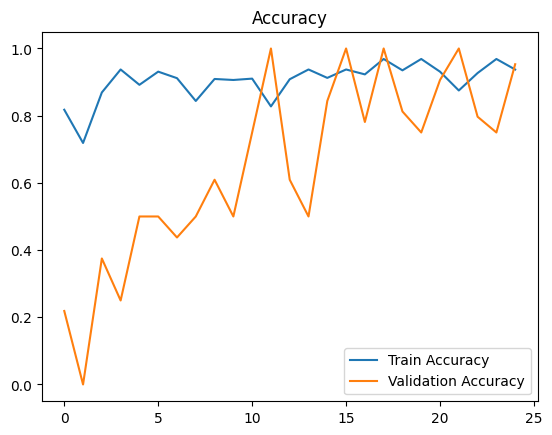

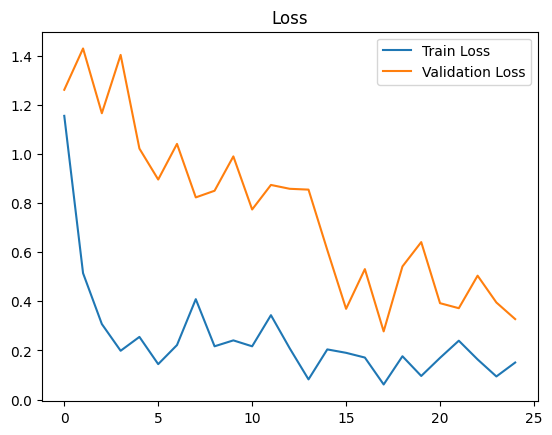

In [9]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [10]:
# Save the trained model to a file
model.save('my_trained_model.keras')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


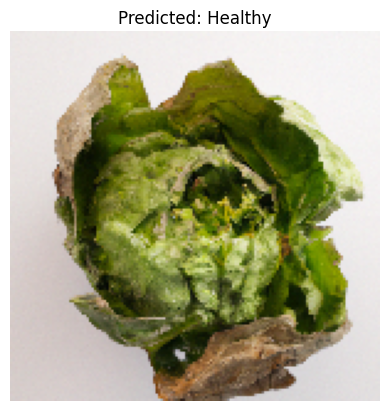

Predicted class: Healthy


In [11]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to the image you want to predict
image_path = '/content/drive/MyDrive/Colab Notebooks/Lettuce/test/-K/k_10.png'

# Load the trained model (use the path to your actual saved model)
model = tf.keras.models.load_model('my_trained_model.keras')

# Load and preprocess the image
img = image.load_img(image_path, target_size=(150, 150))  # Resize the image to the input shape of the model
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image

# Predict the class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# List of class names (replace with your actual class names)
class_names = ['Healthy', '-K', '-N', '-P']

# Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted: {class_names[predicted_class[0]]}")
plt.axis('off')  # Turn off axis
plt.show()

# Print the predicted class
print(f"Predicted class: {class_names[predicted_class[0]]}")
